In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://qiita.com/nokomitch/items/0d1812763114e6266bf3

In [2]:

# ウェイト
w = np.array([[0.016, 0.022, 0.052, 0.055, 0.116, 0.124, 0.615]]).T
# 相関行列
correlation = np.array([
        [1, 0.488, 0.478, 0.515, 0.439, 0.512, 0.491],
        [0.488, 1, 0.664, 0.655, 0.310, 0.608, 0.779],
        [0.478, 0.664, 1, 0.861, 0.355, 0.783, 0.668],
        [0.515, 0.655, 0.861, 1, 0.354, 0.777, 0.653],
        [0.439, 0.310, 0.355, 0.354, 1, 0.405, 0.306],
        [0.512, 0.608, 0.783, 0.777, 0.405, 1, 0.652],
        [0.491, 0.779, 0.668, 0.653, 0.306, 0.652, 1]])
# 標準偏差
std = np.array([[0.16, 0.203, 0.248, 0.271, 0.21, 0.2, 0.187]])
# 相関行列と標準偏差から共分散行列を計算
Sigma = correlation * np.dot(std.T, std)
# パラメータdelta  値はHe&Litterman(1999)に従う
delta = 2.5
# パラメータtau  値はHe&Litterman(1999)に従う
tau = 0.05

In [3]:
# 均衡リターンを求める(reverse optimization)
r_eq = delta * np.dot(Sigma, w)

In [4]:
# 見通しの作成
P = np.array([
        [0,0,-0.295,1,0,-0.705,0],
        [0,1,0,0,0,0,-1]]) # 2x7 matrix (2: number of views, 7: number of assets)
Q = np.array([[0.05],[0.03]]) # 2-vector
Omega = np.array([
        [0.001065383332,0],
        [0,0.0008517381]])

In [6]:
# 見通しの反映
# 期待収益率に反映
r_posterior = r_eq + np.dot( np.dot( tau*np.dot(Sigma,P.T), np.linalg.inv(tau*np.dot(np.dot(P,Sigma),P.T)+Omega)), (Q-np.dot(P,r_eq)))
# 共分散行列の反映
Sigma_posterior = Sigma + tau*Sigma - tau*np.dot( np.dot( np.dot(Sigma,P.T), np.linalg.inv(tau*np.dot(np.dot(P,Sigma),P.T)+Omega)), tau*np.dot(P,Sigma))

<AxesSubplot:>

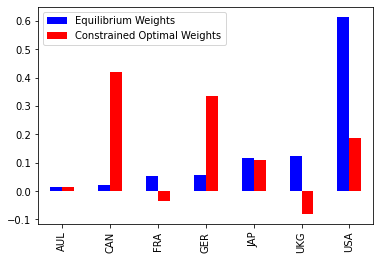

In [8]:
# Forward Optimizationをして最適ウェイトを求める
w_posterior = np.dot(np.linalg.inv(delta*Sigma_posterior), r_posterior)
df = pd.DataFrame([w.reshape(7),w_posterior.reshape(7)],
                  columns=['AUL','CAN','FRA','GER','JAP','UKG','USA'],
                  index=['Equilibrium Weights','Constrained Optimal Weights'])
df.T.plot(kind='bar', color='br')

In [9]:
np.dot( np.dot( tau*np.dot(Sigma,P.T), np.linalg.inv(tau*np.dot(np.dot(P,Sigma),P.T)+Omega)), (Q-np.dot(P,r_eq)))

array([[ 0.00484591],
       [ 0.01814675],
       [ 0.01121658],
       [ 0.02182707],
       [ 0.00313537],
       [ 0.00203967],
       [-0.00078487]])

In [16]:
Q

array([[0.05],
       [0.03]])

In [17]:
np.dot(P,r_eq)

array([[ 0.01790381],
       [-0.00644857]])

In [24]:
r_eq.T.T

array([[0.03937555],
       [0.0691519 ],
       [0.08358087],
       [0.0902724 ],
       [0.0430281 ],
       [0.06767693],
       [0.07560047]])